# Space server classification

# 1. Problem statement
> We have the dataset of containing information about space and we have to classify the class(MultiClassification problem)

# 2.Data
> The data consists of 10000 records of space taken by SDSS every observation is described by 17 feature columns and 1 class column which identifies it is either star, galaxy and quasar 

# 3.Evaluation
> if our model gives the accuracy more than 80 then we will proceed with this project

# 4. Features
* 1.Objid : Object identifier
* 2.ra : J2000Right Ascension
* 3.dec : J2000 Declination
* 4.u : Better of Dev/Exp magnitude fit
* 5.g : Better of Dev/Exp magnitude fit
* 6.r : Better of Dev/Exp magnitude fit
* 7.i : Better of Dev/Exp magnitude fit
> The Thuann Gunn astronomic magnitude system. u, g, r, i represent the response of the 5 bands of the telescope
* 8.run : which represents specific scan
* 9.rerun : It specifies how the image was processed
* 10.camcol : a number from 1 to 6 identifying the scanline
* 11.field : The field number typically starts at 11 and can be as long as 800 for particular scanline
* 12.specobjid : object idedntifier
* 13.class: star, galaxy, quasar (categorical)
* 14.redshift:Final redshift
* 15.plate:plate number
* 16.mjd: MJD of observation
* 17.fibreid : fibreid

> * `Class` is the dependent variable (target variable)
> * All the other columns are the independent variables(input variables)

# Getting tools ready

In [1]:
#lets import the visualization libraries
import  pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder

#lets import the required models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble  import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier

#lets import the required metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, accuracy_score
from sklearn.metrics import recall_score, f1_score, precision_score

#lets filter warnings
import warnings
warnings.filterwarnings('ignore')

# Reading the data

In [2]:
df = pd.read_csv('Skyserver.csv')
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [4]:
#lets check for the missing values
df.isna().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

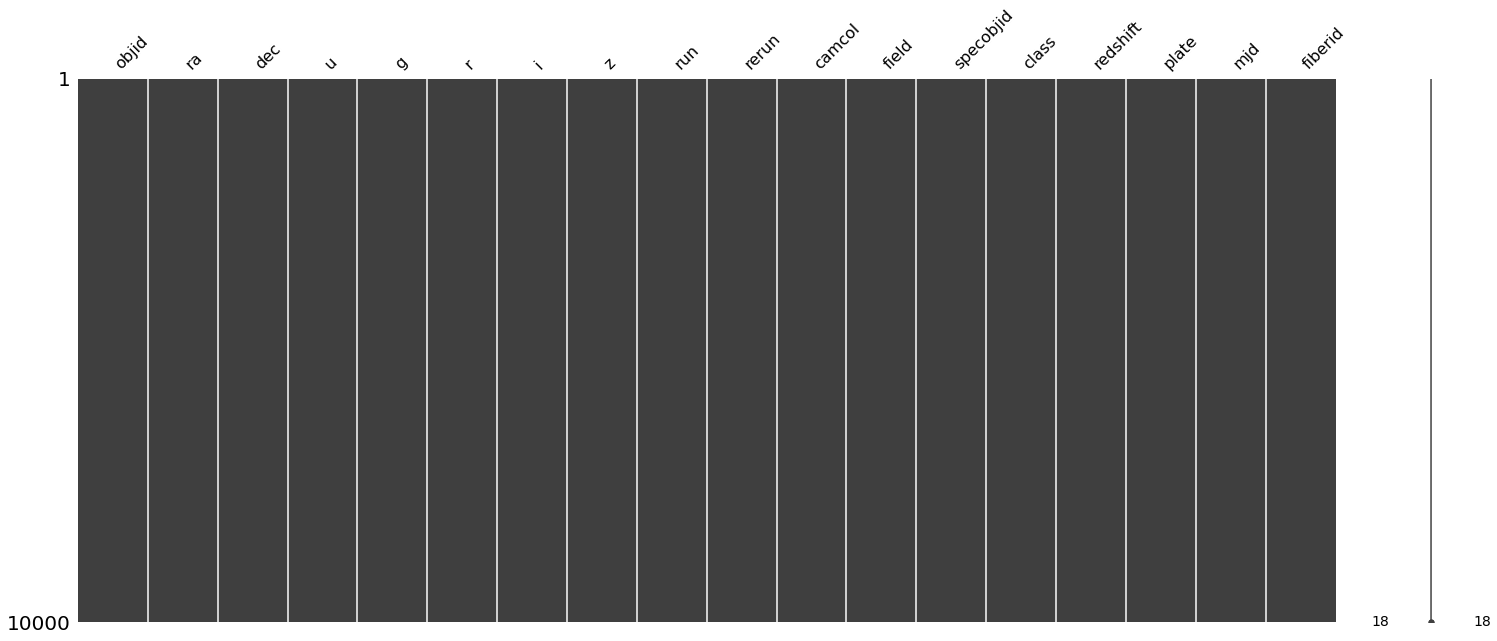

In [5]:
#visualizing the missing values
missingno.matrix(df);

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64


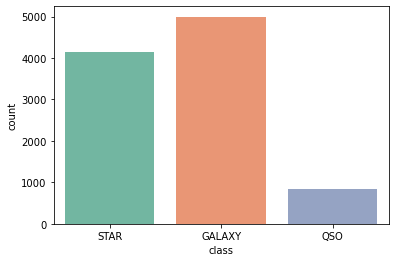

In [6]:
#lets visualize the count
sns.countplot(df['class'], palette = 'Set2');
print(df['class'].value_counts())

In [7]:
le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])
df['class'].value_counts()

0    4998
2    4152
1     850
Name: class, dtype: int64

In [8]:
df.nunique()

objid            1
ra           10000
dec          10000
u             9730
g             9817
r             9852
i             9890
z             9896
run             23
rerun            1
camcol           6
field          703
specobjid     6349
class            3
redshift      9637
plate          487
mjd            355
fiberid        892
dtype: int64

# Exploratory data analysis

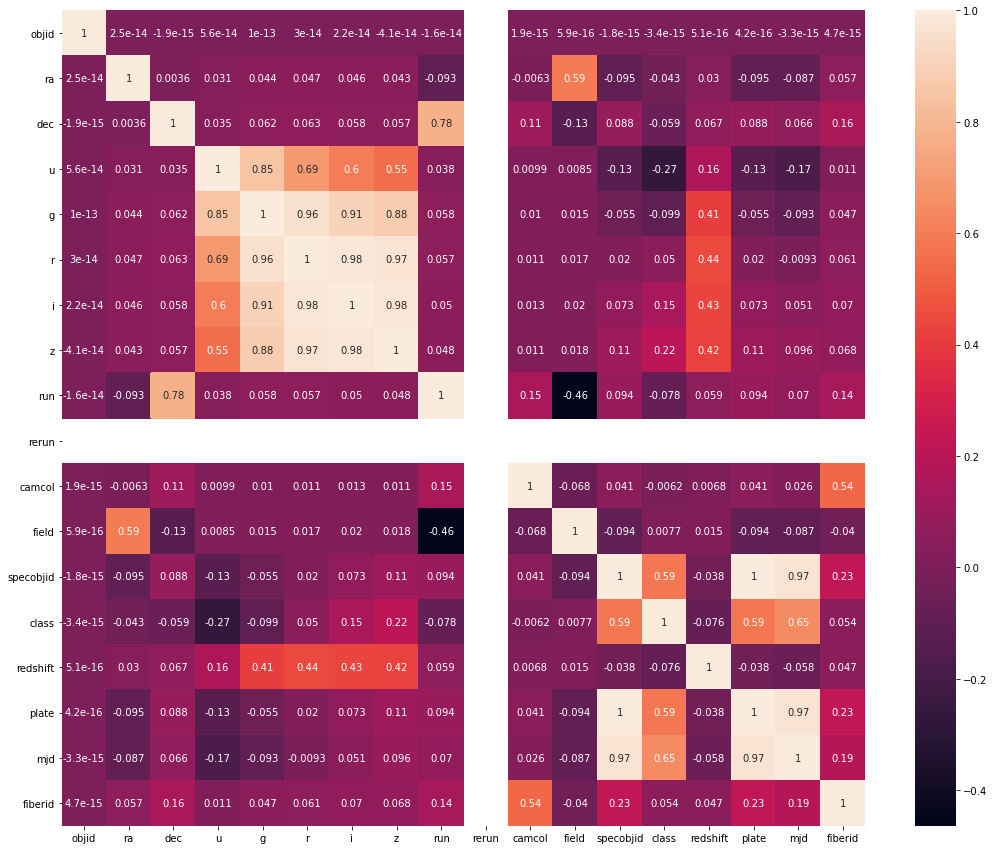

In [9]:
plt.figure(figsize = (18, 15))
sns.heatmap(df.corr(),
           annot = True);

***We can see that some features are not correlated with the class and with single value lets drop them***

In [10]:
df.drop(['run', 'rerun', 'camcol', 'field', 'objid', 'ra', 'dec'], axis = 1, inplace = True)
#dropped 'ra' and 'dec' as it as unique values of equal to the length of dataset there is no pattern in it so..

In [11]:
df.head()

,u,g,r,i,z,specobjid,class,redshift,plate,mjd,fiberid
0,19.47406,17.04240,15.94699,15.50342,15.22531,3.722360e+18,2,-0.000009,3306,54922,491
1,18.66280,17.21449,16.67637,16.48922,16.39150,3.638140e+17,2,-0.000055,323,51615,541
2,19.38298,18.19169,17.47428,17.08732,16.80125,3.232740e+17,0,0.123111,287,52023,513
3,17.76536,16.60272,16.16116,15.98233,15.90438,3.722370e+18,2,-0.000111,3306,54922,510
4,17.55025,16.26342,16.43869,16.55492,16.61326,3.722370e+18,2,0.000590,3306,54922,512


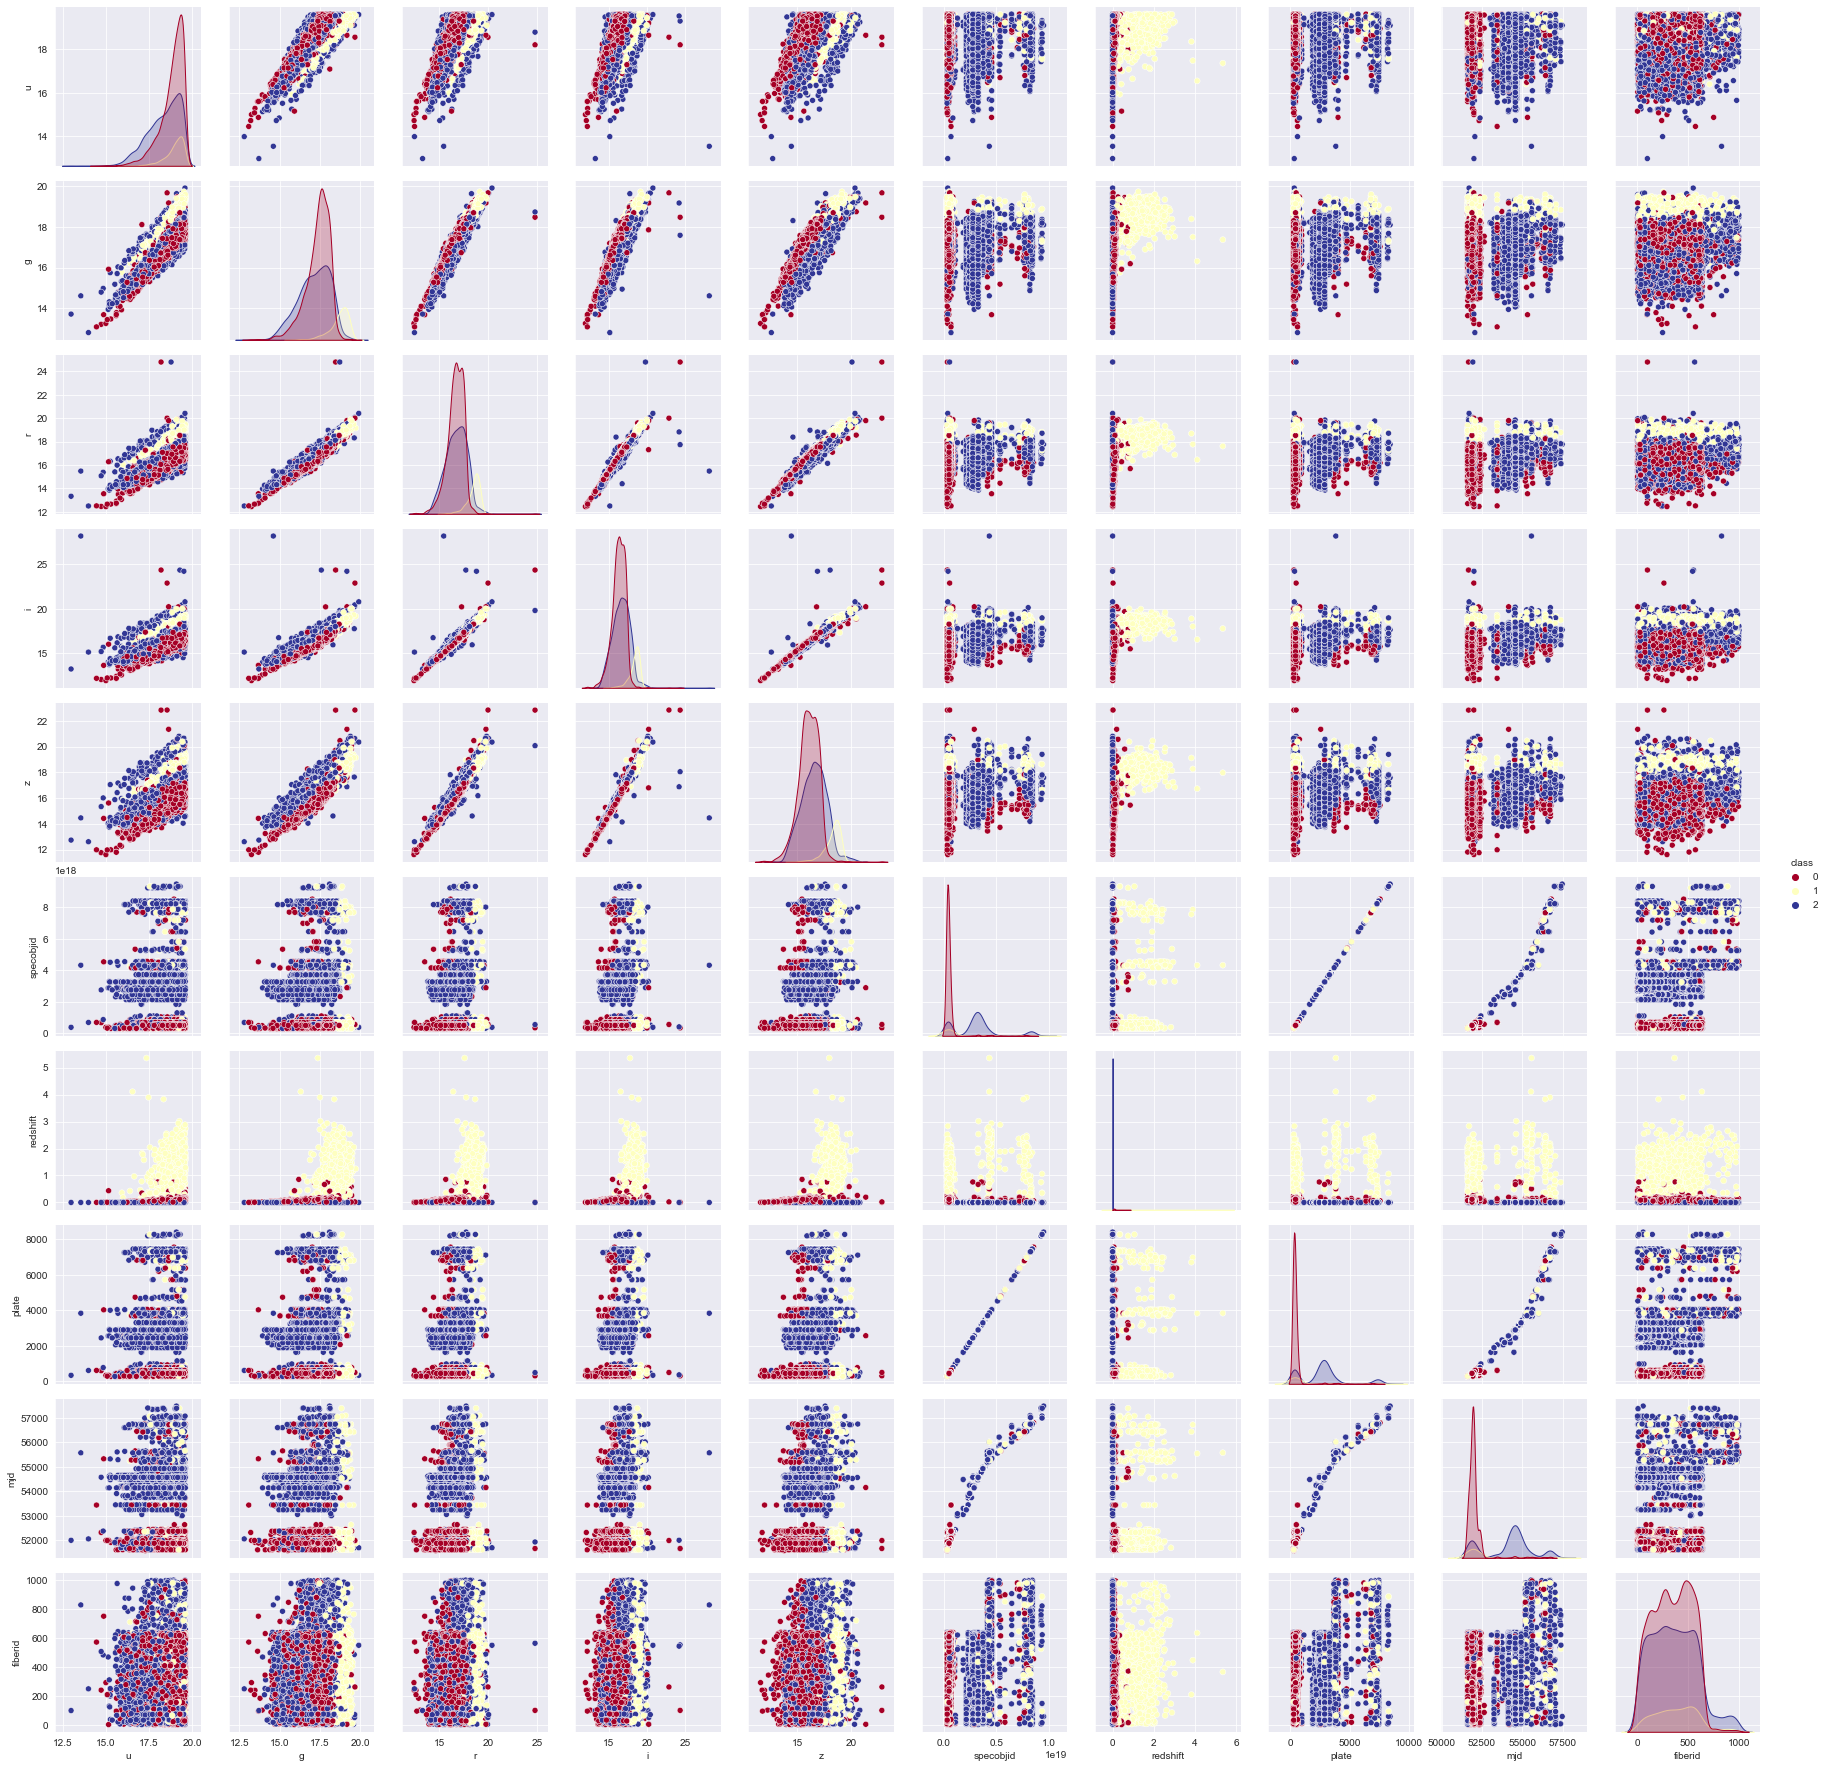

In [31]:
sns.set_style('darkgrid')
sns.pairplot(df, hue = 'class', palette = 'RdYlBu');

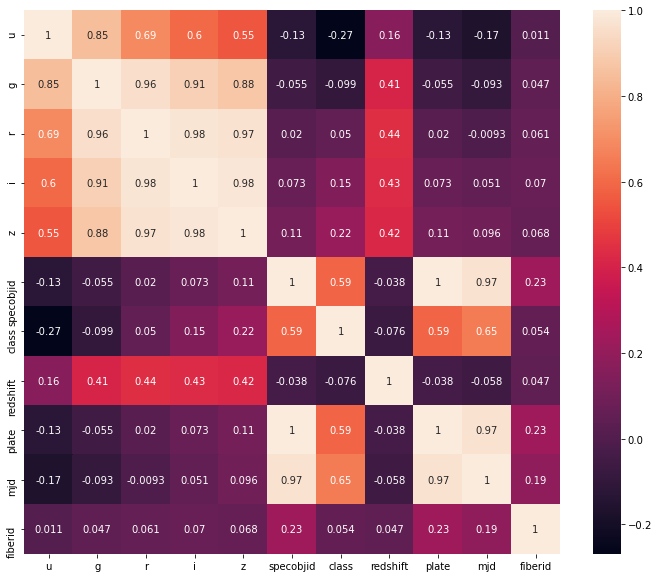

In [13]:
#lets visualize the correlation again
plt.figure(figsize = (12,10))
sns.heatmap(df.corr(),
           annot = True);

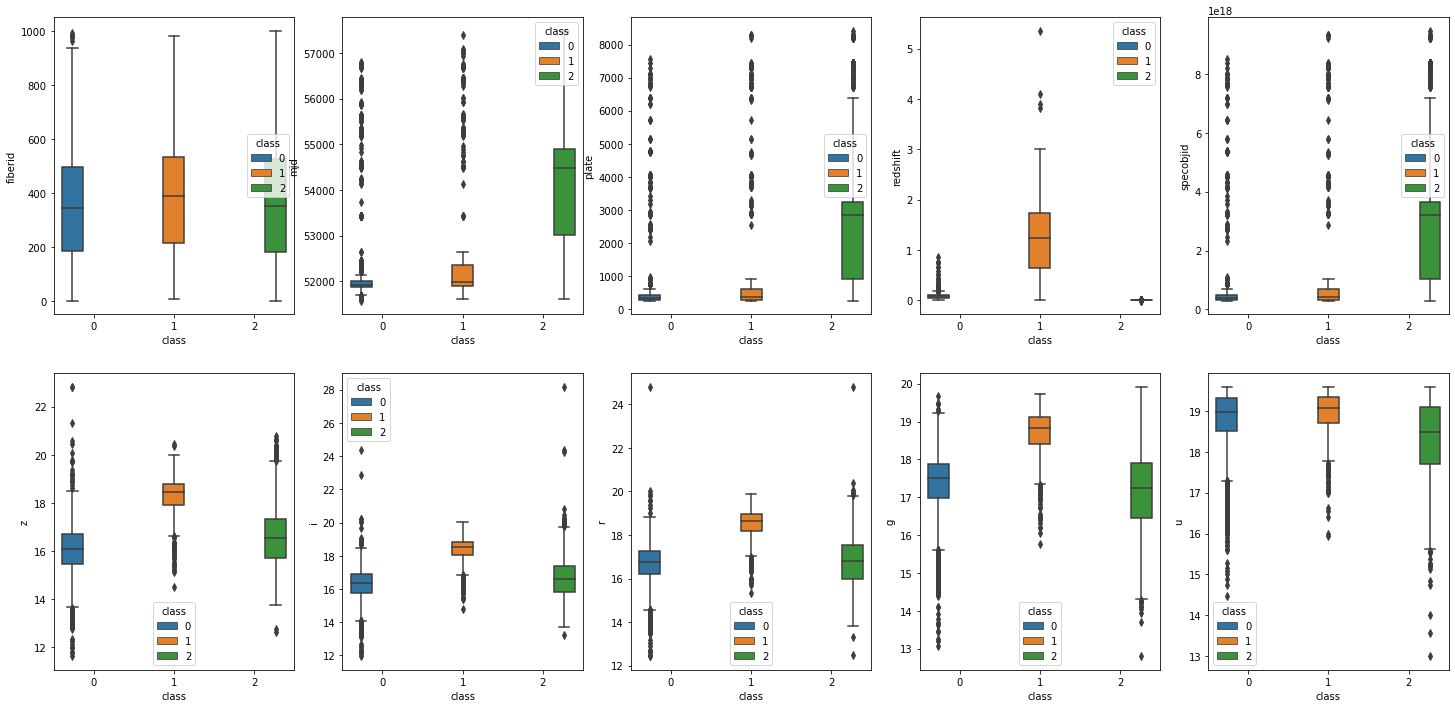

In [14]:
#Lets check for the outliers with box plot
fig, ((ax1, ax2, ax3, ax4, ax5), (ax6,ax7, ax8, ax9,ax10)) = plt.subplots(nrows = 2, ncols = 5, figsize = (25, 12))
sns.boxplot(ax = ax1, x = df['class'], y = df['fiberid'], hue = df['class'])
sns.boxplot(ax = ax2, x = df['class'], y = df['mjd'], hue = df['class'])
sns.boxplot(ax = ax3, x = df['class'], y = df['plate'], hue = df['class'])
sns.boxplot(ax = ax4, x = df['class'], y = df['redshift'], hue = df['class'])
sns.boxplot(ax = ax5, x = df['class'], y = df['specobjid'], hue = df['class'])
sns.boxplot(ax = ax6, x = df['class'], y = df['z'], hue = df['class'])
sns.boxplot(ax = ax7, x = df['class'], y = df['i'], hue = df['class'])
sns.boxplot(ax = ax8, x = df['class'], y = df['r'], hue = df['class'])
sns.boxplot(ax = ax9, x = df['class'], y = df['g'], hue = df['class'])
sns.boxplot(ax = ax10, x = df['class'], y = df['u'], hue = df['class']);

# Treating the outliers

In [15]:
zscore = abs(zscore(df))
print(df.shape)
df_new = df.loc[(zscore<3).all(axis = 1)]
print(df_new.shape)

(10000, 11)
(9066, 11)


## Lets visualize the skewness

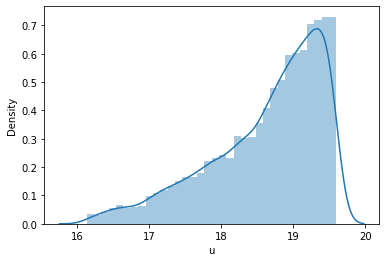

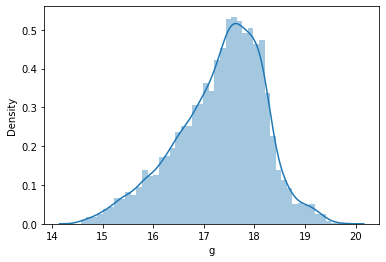

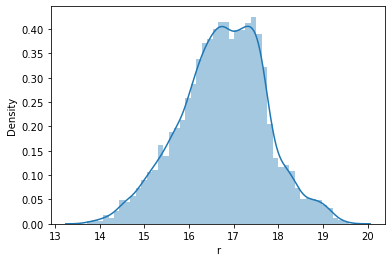

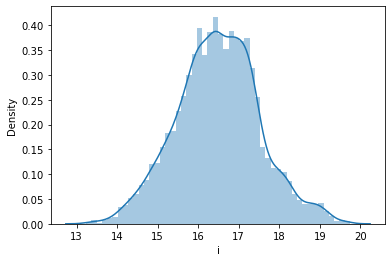

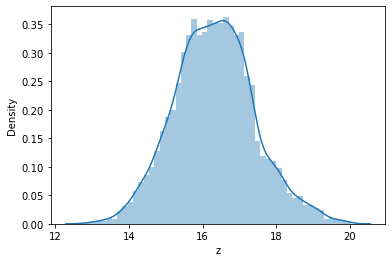

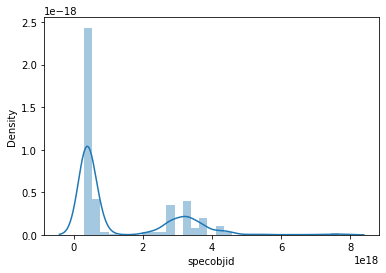

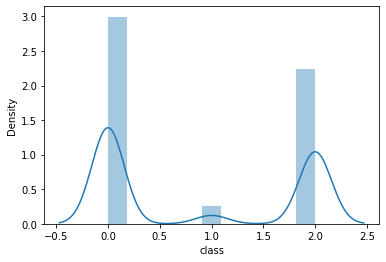

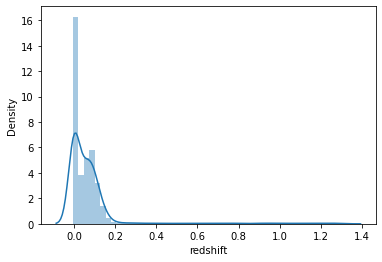

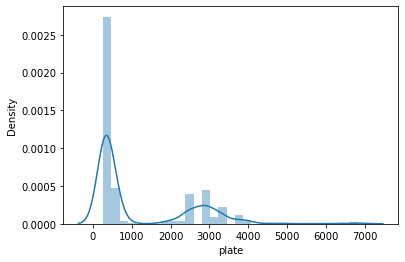

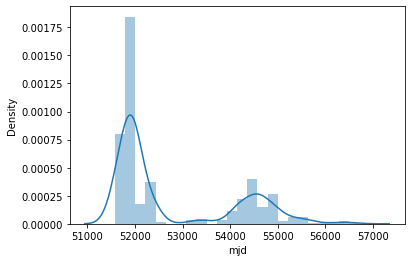

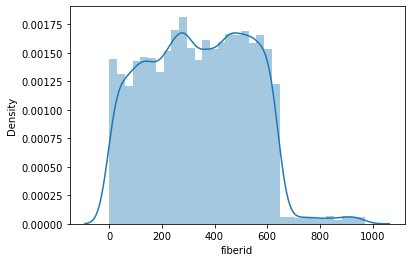

In [16]:
for cols in df_new.columns:
    sns.distplot(df_new[cols])
    plt.show()

In [17]:
#splitting the values
X = df_new.drop('class', axis = 1)
y = df_new['class']

In [18]:
X.skew()

u           -0.970879
g           -0.515680
r           -0.146609
i            0.060173
z            0.170225
specobjid    1.306658
redshift     4.963494
plate        1.306642
mjd          0.958779
fiberid      0.117247
dtype: float64

## Lets try to treat the skewness

In [19]:
for cols in X.skew().index:
    if cols in X.describe().columns:
        if X[cols].skew()>0.55:
            X[cols] = np.log1p(X[cols])
        if X[cols].skew()< - 0.55 :
            X[cols] = np.sqrt(X[cols])

In [20]:
X.skew()

u           -1.013212
g           -0.515680
r           -0.146609
i            0.060173
z            0.170225
specobjid    0.730712
redshift     4.205174
plate        0.731118
mjd          0.944043
fiberid      0.117247
dtype: float64

In [21]:
# lets try  log transfoemation on redshift
# X['redshift'] = np.sqrt(X['redshift'])
# X['u'] = np.sqrt(X['u'])
# X.skew()

**we treated the skewness by using the square root method and the log transformation method**

In [22]:
#Scaling the data
sd = StandardScaler()
X_new = sd.fit_transform(X)

In [23]:
#splitting the test and train data
X_train, X_test, y_train, y_test = train_test_split(X_new,
                                                   y,
                                                   test_size = 0.2)

## Building model

In [24]:
models = [LogisticRegression(), SVC(), KNeighborsClassifier(), DecisionTreeClassifier(), GaussianNB(), RandomForestClassifier(), GradientBoostingClassifier(), AdaBoostClassifier(), BaggingClassifier()]
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(model)
    print('Accuracy_score :', accuracy_score(y_test, y_pred))
    print( confusion_matrix(y_test, y_pred))
    print( classification_report(y_test, y_pred))
    print('\n')

LogisticRegression()
Accuracy_score : 0.980154355016538
[[957   3  25]
 [  8  68   0]
 [  0   0 753]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       985
           1       0.96      0.89      0.93        76
           2       0.97      1.00      0.98       753

    accuracy                           0.98      1814
   macro avg       0.97      0.96      0.96      1814
weighted avg       0.98      0.98      0.98      1814



SVC()
Accuracy_score : 0.9751929437706726
[[951   3  31]
 [  9  67   0]
 [  2   0 751]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       985
           1       0.96      0.88      0.92        76
           2       0.96      1.00      0.98       753

    accuracy                           0.98      1814
   macro avg       0.97      0.95      0.96      1814
weighted avg       0.98      0.98      0.98      1814



KNeighborsClassifier()
Accuracy_score : 0.95

## Lets check if it is overfitting

In [25]:
models = [LogisticRegression(), SVC(), KNeighborsClassifier(), DecisionTreeClassifier(), GaussianNB(), RandomForestClassifier(), GradientBoostingClassifier(), AdaBoostClassifier(), BaggingClassifier()]
for model in models:
    Score = cross_val_score(model, X_new, y,cv = 10,  scoring = 'accuracy')
    print(model)
    print('Score :', Score)
    print('Mean :', Score.mean())
    print('\n')

LogisticRegression()
Score : [0.98897464 0.98125689 0.98897464 0.98676957 0.99007718 0.98676957
 0.98565121 0.97461369 0.98785872 0.9790287 ]
Mean : 0.9849974809611777


SVC()
Score : [0.98676957 0.97133407 0.98787211 0.98125689 0.98235943 0.98125689
 0.97792494 0.97019868 0.98565121 0.97682119]
Mean : 0.9801444979081027


KNeighborsClassifier()
Score : [0.97353914 0.95148842 0.96802646 0.94597574 0.95479603 0.96251378
 0.93487859 0.94260486 0.97240618 0.96247241]
Mean : 0.9568701611941461


DecisionTreeClassifier()
Score : [0.98235943 0.98897464 0.98125689 0.98346196 0.99117971 0.99007718
 0.98013245 0.98013245 0.98896247 0.98233996]
Mean : 0.9848877141487231


GaussianNB()
Score : [0.93605292 0.90628445 0.92943771 0.90297685 0.8985667  0.91951488
 0.87196468 0.91059603 0.93046358 0.9415011 ]
Mean : 0.9147358903402771


RandomForestClassifier()
Score : [0.99117971 0.98676957 0.98897464 0.99117971 0.99117971 0.99228225
 0.98565121 0.9812362  0.99227373 0.98896247]
Mean : 0.988968922119

***From our experimentation `gradient boosting classifier` is performing slightly well when comparing to other models***

## Hyperparameter tuning

In [41]:
params = {'loss':['deviance'],
         'learning_rate' : [0.01, 0.2],
         'criterion':['friedman_mse', 'mae'],
         'subsample':[0.5, 0.618,0.8, 0.85, 0.9,1.0],
         'n_estimators':[10, 20, 50]}
GBC = GridSearchCV(GradientBoostingClassifier(), param_grid = params, cv = 5, verbose = True, scoring = 'accuracy')
GBC.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed: 155.6min finished


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'mae'],
                         'learning_rate': [0.01, 0.2], 'loss': ['deviance'],
                         'n_estimators': [10, 20, 50],
                         'subsample': [0.5, 0.618, 0.8, 0.85, 0.9, 1.0]},
             scoring='accuracy', verbose=True)

In [42]:
GBC.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.2,
 'loss': 'deviance',
 'n_estimators': 10,
 'subsample': 1.0}

# Metrics

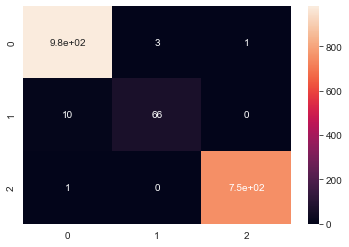

In [46]:
GBC_pred = GBC.predict(X_test)
sns.heatmap(confusion_matrix(y_test, GBC_pred),
           annot = True);

In [44]:
print(classification_report(y_test, GBC_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       985
           1       0.96      0.87      0.91        76
           2       1.00      1.00      1.00       753

    accuracy                           0.99      1814
   macro avg       0.98      0.95      0.97      1814
weighted avg       0.99      0.99      0.99      1814



In [59]:
print('Accuracy score :', accuracy_score(y_test, GBC_pred))
print('f1_score :', f1_score(y_test, GBC_pred, average = 'macro'))
print('recall_score :', recall_score(y_test, GBC_pred, average = 'macro'))
print('Precision_score :', precision_score(y_test, GBC_pred, average = 'macro'))

Accuracy score : 0.9917309812568909
f1_score : 0.9671431843078677
recall_score : 0.9543440392258851
Precision_score : 0.9813683360682252


In [65]:
#saving the prpedictions to csv
predictions  = pd.DataFrame(GBC_pred)
predictions.to_csv('Predictions.csv')

# Saving Model

In [ ]:
import joblib
joblib.dump(GBC, S)